# React and TypeScript

## What is React

`React` is a popular `JavaScript` library for building user interfaces, **particularly single-page applications**. It allows developers to create reusable UI components and manage the state of their applications efficiently.

![img](https://miro.medium.com/v2/resize:fit:800/1*RtAQYp558yHr9UjZzDJmAg.jpeg)

## What is TypeScript?

`TypeScript` is a superset of `JavaScript` that adds `static` types. This allows developers to catch errors at compile time rather than at runtime, making the development process smoother and more reliable.


## Setting Up Your Development Environment

### Install `Node.js`

`Node.js` is a `JavaScript` runtime that allows you to run `JavaScript` code outside of a browser. It also comes with `npm` (Node Package Manager), which you'll use to install libraries and tools.

- **Download `Node.js`**: Go to the [Node.js official website](https://nodejs.org/) and **download the LTS version** suitable for your operating system.
- **Install `Node.js`**: Follow the installation instructions provided for your operating system. After installation, you can verify the installation by running the following commands in your terminal:

  ```shell
  node -v
  npm -v
  ```


### Create a New React Project with TypeScript Using `Vite`

`Vite` is a modern frontend build tool that provides a faster and leaner development experience. We'll use `Vite` to create our `React` project with `TypeScript`.

- **Open your terminal**: Make sure you are in the directory where you want to create your new project.
- **Run the create command**: Use `npm` to create a new project with `Vite`.

  ```shell
  npm create vite@4.1.0
  ```

- This command will prompt you to provide the project name and select the framework and variant.

  - **Project name**: Enter the desired name for your project (e.g., my-react-app).

  * **Select a framework**: Choose `React`.
  * **Select a variant**: Choose `TypeScript`

- **Navigate to your project directory**: `cd my-react-app`
- **Install dependencies**: `npm install`
- **Run the development server**: `npm run dev`

  - This will start the development server, and you should see output similar to this:

  ```shell
  VITE v4.1.0  ready in 300 ms

  ➜  Local:   http://localhost:5173/
  ➜  Network: use --host to expose
  ```


## Understanding the Project Structure

Once your project is created, you will notice several files and folders. Here are the key components:

- `src/`: This directory contains your source code.
  - `App.tsx`: The main application component.
  - `main.tsx`: The entry point of your React application.
- `index.html`: The HTML template for your app.
- `tsconfig.json`: Configuration file for TypeScript.
- `vite.config.ts`: Configuration file for Vite.


## Creating Your First Component

Let's create a simple React component to get familiar with the basic concepts.

### Create a new file in the `src` directory named `Hello.tsx`

```ts
// src/Hello.tsx
import React from "react";

interface HelloProps {
  name: string;
}

const Hello: React.FC<HelloProps> = ({ name }) => {
  return <h1>Hello, {name}!</h1>;
};

export default Hello;
```

- In `TypeScript`, an `interface` is a way to **define the structure of an object**. It specifies the types of **properties** that an object can have.
  - In our example, we define an `interface` `HelloProps`, This `interface` specifies that any object of type `HelloProps` must have a `name` property of type `string`.
- `React components` can be written as either `class` components or `functional` components. **Functional components are simpler and often preferred** for their conciseness and ease of use.
  - In our example, We declare a `constant` named `Hello`. it means that `Hello` will always refer to the same component function.
    - This is a common practice in modern JavaScript to ensure that variables and constants are not accidentally reassigned, leading to more predictable and maintainable code.
- `React.FC<HelloProps>`: We specify that `Hello` is a functional component (`React.FC`) that takes props of type `HelloProps`.
  - This ensures that TypeScript will enforce the `HelloProps` type for the props passed to `Hello`.


### Modify `App.tsx` to include your new component:

```ts
// src/App.tsx
import React from "react";
import Hello from "./Hello";

const App: React.FC = () => {
  return (
    <div>
      <Hello name="World" />
    </div>
  );
};

export default App;
```


## Creating a `ListGroup` Component

### Setting Up `Bootstrap`

- Install Bootstrap and its peer dependencies: `npm install bootstrap@5.2.3`
- Import Bootstrap CSS

  - Open `src/main.tsx` and add the following line to import the `Bootstrap` CSS:

  ```ts
  import "bootstrap/dist/css/bootstrap.min.css";
  import React from "react";
  import ReactDOM from "react-dom/client";
  import App from "./App";
  import "./index.css";

  ReactDOM.createRoot(document.getElementById("root") as HTMLElement).render(
    <React.StrictMode>
      <App />
    </React.StrictMode>
  );
  ```


### Creating the ListGroup Component

- Create a new file `src/components/ListGroup.tsx` and define the ListGroup component:
  - [Bootstrap list group documents](https://getbootstrap.com/docs/5.3/components/list-group/)
  - `class` is a reserved keyword in javascript / typescript. We need to substitute it as `className`. (Hint: `ctrl + D` do multiple-cursor modification)
- Add the following into the `ListGroup.tsx`
- Conditional Rendering

  - The `getMessage` function checks if there are any items in the list. If the list is empty (`items.length === 0`), it returns a paragraph element with the message `"No item found"`.
  - **Ternary Operator `(&&)`**: If the length of items is 0, the` <p>No item found.</p>` message is rendered.

  ```ts
  import React from "react";

  function ListGroup() {
    let items = ["New York", "San Francisco", "Tokyo", "London", "Paris"];
    items = [];
    const getMessage = () => {
      return items.length === 0 && <p>No item found.</p>;
    };
    return (
      <React.Fragment>
        <h1>List</h1>
        {getMessage()}
        <ul className="list-group">
          <li>test</li>
          {items.map((item) => (
            <li key={item} className="list-group-item">
              {item}
            </li>
          ))}
        </ul>
      </React.Fragment>
    );
  }

  export default ListGroup;
  ```


### Handle click events

1. Using State with `Hooks`

- `React Hooks` allow you to use state and other React features without writing a class.
- The `useState hook` is particularly useful for managing `state` in `functional components`.
- We use the `useState hook` to manage the selected index of our list items. By calling `setSelectedIndex`, we update the `selectedIndex`, which triggers a `re-render` of the component with the new state.

2. Handling Click Events

   - Handling `click` events in React involves attaching an `onClick` event handler to a `DOM` element.
   - When a list item is clicked, the arrow function sets the `selectedIndex` to the `index` of the clicked item.

3. Dynamic Class Names
   - We use a conditional expression to apply different class names based on whether a list item is selected.
   - If the current item's `index` matches `selectedIndex`, we apply the `active` class to highlight the item.

```ts
import React, { MouseEvent, useState } from "react";

function ListGroup() {
  let items = ["New York", "San Francisco", "Tokyo", "London", "Paris"];
  // Hook
  const [selectedIndex, setSelectedIndex] = useState(0);

  const getMessage = () => {
    return items.length === 0 && <p>No item found.</p>;
  };

  return (
    <React.Fragment>
      <h1>List</h1>
      {getMessage()}
      <ul className="list-group">
        {items.map((item, index) => (
          <li
            key={index}
            className={
              selectedIndex === index
                ? "list-group-item active"
                : "list-group-item"
            }
            // onClick={() => console.log(item + "been clicked\n" + index)}
            onClick={() => {
              setSelectedIndex(index);
            }}
          >
            {item}
          </li>
        ))}
      </ul>
    </React.Fragment>
  );
}

export default ListGroup;
```


### Passing data via props

In this section, we will extend our `ListGroup` component to accept data through `props`.
This approach allows us to make our component more reusable and flexible by allowing it to receive different sets of data and headings.

1. Props Interface

   - In `TypeScript`, we define an `interface` to specify the types of `props` that a component will receive.
   - This ensures that our `component` is used correctly, with the correct types of data being passed in.

   ```ts
   interface ListGroupProps {
     items: string[];
     heading: string;
   }
   ```

2. Destructuring Props

   - When we define the `component`, we can `destructure` the `props` directly in the function parameter list. This makes the code cleaner and easier to read.
   - Instead of accessing `props.items` and `props.heading` within the component, we destructure these properties directly in the function signature.

   ```ts
   function ListGroup({ items, heading }: ListGroupProps) {
     // Component logic here
   }
   ```

3. Using the Component

   - To see the `ListGroup component` in action, we can create a `parent component` that passes different sets of data to it.

   ```ts
   // src/App.tsx
   import React from "react";
   import Hello from "./Hello";
   import ListGroup from "./components/ListGroup";

   const App: React.FC = () => {
     let city_items = ["New York", "San Francisco", "Tokyo", "London", "Paris"];
     let cat_items = [
       "Maine Coon",
       "Ragdoll",
       "Persian",
       "Abyssinian",
       "Siamese",
     ];
     return (
       <div>
         <Hello name="World" />
         <ListGroup items={city_items} heading="Cities"></ListGroup>
         <ListGroup items={cat_items} heading="Cats"></ListGroup>
       </div>
     );
   };

   export default App;
   ```


### Passing functions via Props

In this section, we'll focus on how to pass `functions` as `props` to a component.

This allows a `parent component` to **control** how certain actions are **handled** when they occur in a `child component`.

1. Function as Prop

   - In `React`, `functions` can be passed as `props` to `child components`. This allows the `parent component` to define the behavior for certain actions in the child component.
   - `onSelectItem`: A `function prop` that takes two arguments, `heading` and `item`. This function will be called when a list item is clicked.

   ```ts
   interface ListGroupProps {
     items: string[];
     heading: string;
     onSelectItem: (heading: string, item: string) => void;
   }
   ```

2. Callback Functions

   - A `callback function` is a `function` passed into `another function` **as an argument**. This technique is useful for handling events that occur in child components within the parent component.
   - `handleSelectItem`: This `function` is defined in the `parent component (App)`. It logs the heading and item to the `console` whenever it is called.

   ```ts
   const handleSelectItem = (heading: string, item: string) => {
     console.log(`Heading: ${heading}, Item: ${item}`);
   };
   ```

3. Using the Component

   - To see the `ListGroup` component in action, we can create a `parent component (App)` that passes the `handleSelectItem` function to it.

   ```ts
   import React from "react";
   import ListGroup from "./components/ListGroup";

   const App: React.FC = () => {
     const city_items = [
       "New York",
       "San Francisco",
       "Tokyo",
       "London",
       "Paris",
     ];
     const cat_items = [
       "Maine Coon",
       "Ragdoll",
       "Persian",
       "Abyssinian",
       "Siamese",
     ];

     const handleSelectItem = (heading: string, item: string) => {
       console.log(`Heading: ${heading}, Item: ${item}`);
     };

     return (
       <div>
         <ListGroup
           items={city_items}
           heading="Cities"
           onSelectItem={handleSelectItem}
         />
         <ListGroup
           items={cat_items}
           heading="Cats"
           onSelectItem={handleSelectItem}
         />
       </div>
     );
   };

   export default App;
   ```


## State vs Props

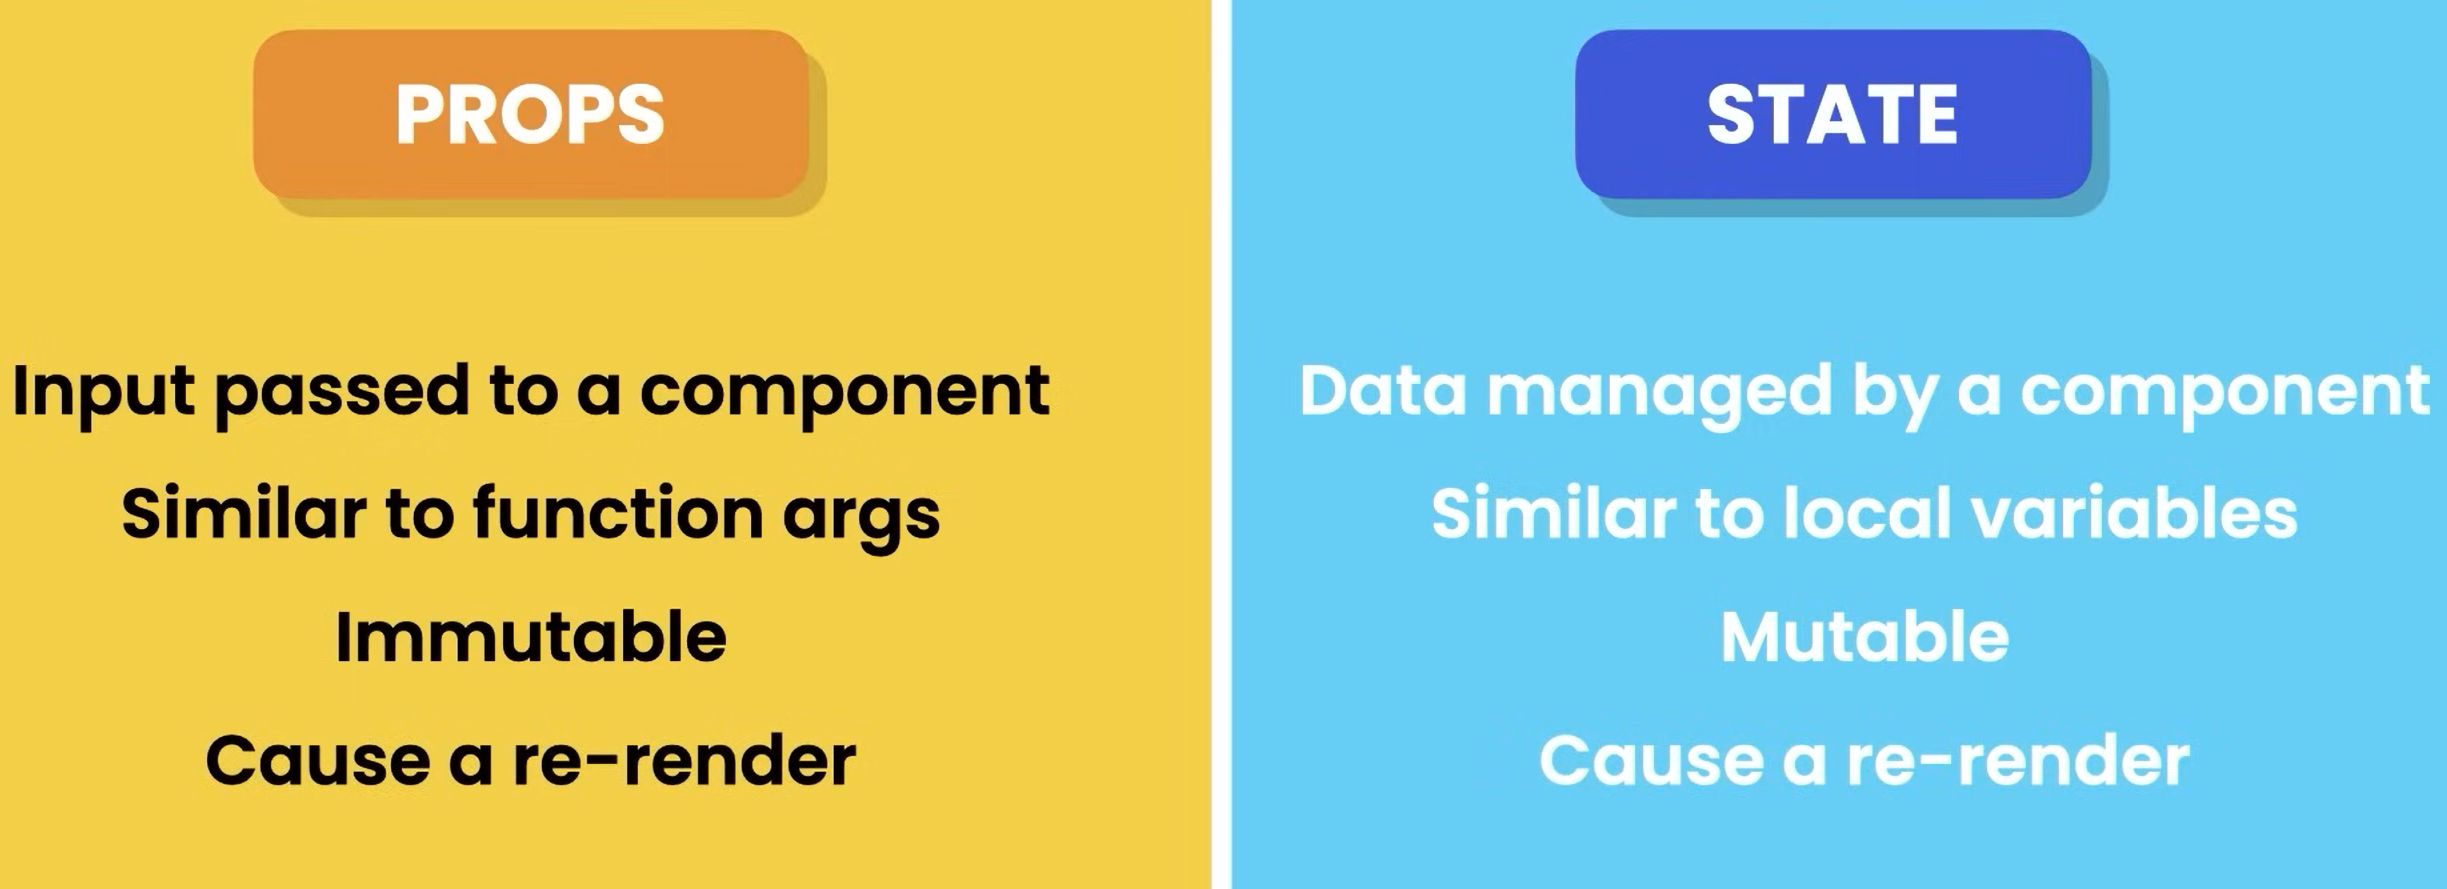


## Creating a component accept children

In this section, we'll focus on how to create a `React component` that can accept and render `children elements`.

1. `Children Prop`

   - In `React`, the `children prop` is a special prop that is **automatically passed to every component**. It contains the content nested inside the component’s opening and closing tags when it is used.
   - `children`: This `prop` is of type `ReactNode`, which can represent any renderable React content, including `elements`, `strings`, `numbers`, `fragments`, and `arrays`.

   ```ts
   interface AlertProps {
     children: ReactNode;
   }
   ```

2. Using the Component

   ```ts
   <Alert>
     Hello <span>World</span>
   </Alert>
   ```
